# Check difference between github C and self generate c by FINN

In [39]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

In [40]:
def mse(a,b):
    return np.square(a - b).mean()

def max_abs_err(a,b):
    return np.abs(a - b).max()

In [41]:
Nt = 51
c_github_langmuir = np.load("../data/synthetic_data/retardation_langmuir/c_train.npy")[:Nt]
c_github_linear = np.load("../data/synthetic_data/retardation_linear/c_train.npy")[:Nt]
c_github_freundlich = np.load("../data/synthetic_data/retardation_freundlich/c_train.npy")[:Nt]
c_FINN_forward_langmuir = np.load("../data/synthetic_data/FINN_forward_solver/retardation_langmuir/c_train.npy")[:Nt]
c_FINN_forward_linear = np.load("../data/synthetic_data/FINN_forward_solver/retardation_linear/c_train.npy")[:Nt]
c_FINN_forward_freundlich = np.load("../data/synthetic_data/FINN_forward_solver/retardation_linear/c_train.npy")[:Nt]

print(c_github_langmuir.shape)
print(c_FINN_forward_linear.shape)
print(c_FINN_forward_langmuir.shape)
print(c_FINN_forward_freundlich.shape)

print(f"{mse(c_github_langmuir, c_FINN_forward_langmuir):.2e}, {max_abs_err(c_github_langmuir, c_FINN_forward_langmuir):.2e}, ")
print(f"{mse(c_github_linear, c_FINN_forward_linear):.2e}, {max_abs_err(c_github_linear, c_FINN_forward_linear):.2e}, ")
print(f"{mse(c_github_freundlich, c_FINN_forward_freundlich):.2e}, {max_abs_err(c_github_freundlich, c_FINN_forward_freundlich):.2e}, ")

(51, 2, 26)
(51, 2, 26)
(51, 2, 26)
(51, 2, 26)
1.80e-01, 1.97e+00, 
2.15e-01, 2.44e+00, 
2.30e-01, 2.50e+00, 


5.49e-01
5.18e-03


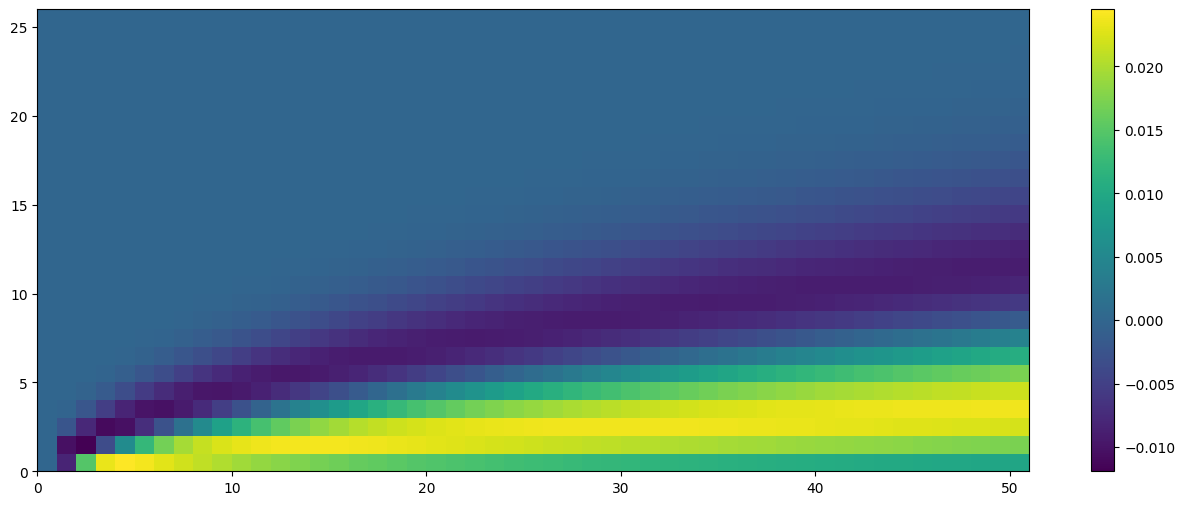

In [42]:
diff_FINN_langmuir_linear = c_FINN_forward_langmuir - c_FINN_forward_linear
print(f"{np.abs(diff_FINN_langmuir_linear).max():.2e}")
print(f"{np.square(diff_FINN_langmuir_linear).mean():.2e}")

plt.figure(figsize=(16, 6))
plt.colorbar(plt.pcolormesh(diff_FINN_langmuir_linear[:, 0, :].T))
plt.show()

The above shows that the difference between the concentration field computed using a linear and a Langmuir isotherm using the FINN forward code are not that different (MSE < 6*1e-3 and max error < 0.6).

Below we compare this with the error between the **Langmuir c from github** and the **Langmuir FINN forward c**

1.97e+00
1.80e-01


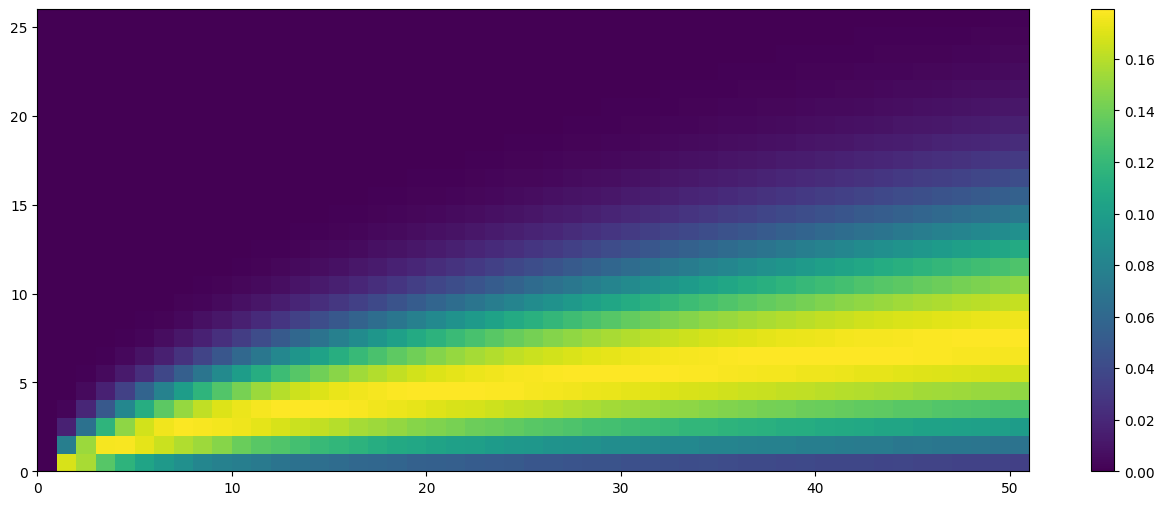

In [43]:
import matplotlib.pyplot as plt

diff_langmuir_FINN_langmuir = c_github_langmuir - c_FINN_forward_langmuir
print(f"{np.abs(diff_langmuir_FINN_langmuir).max():.2e}")
print(f"{np.square(diff_langmuir_FINN_langmuir).mean():.2e}")

plt.figure(figsize=(16, 6))
plt.colorbar(plt.pcolormesh(diff_langmuir_FINN_langmuir[:, 0, :].T))
plt.show()

Here, both errors are much larger (> one order of magnitude). This is surprising.

But how do the isotherms look like when trained on FINN forward c compared to github c?

## Isotherms

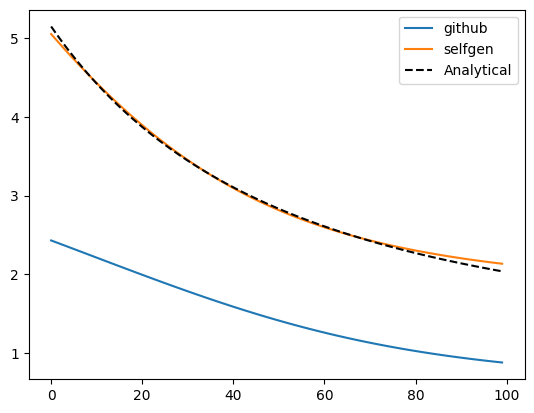

In [44]:
finn_dirs = {
    "github" : Path("../data_out/FINN_forward_tests/finn_langmuir_github_c"),
    "selfgen" : Path("../data_out/FINN_forward_tests/finn_langmuir_selfgen_c"),
}

for c_origin, finn_dir in finn_dirs.items():
    ret = np.load(finn_dir / "predicted_retardations/retPred_100.npy")
    plt.plot(ret, label=c_origin)

ret_analytical = np.load(finn_dirs["github"] / "retardation_langmuir.npy")

plt.plot(ret_analytical, "k--", label="Analytical")
plt.legend()
plt.show()

Surprisingly, the github one has a huge error.

What's the c-error then?

In [45]:
for c_origin, finn_dir in finn_dirs.items():
    c_train = np.load(finn_dir / "c_train.npy")
    c_pred = np.load(finn_dir / "c_predictions.npy")
    print(f"{c_origin}, {np.square(c_train - c_pred).mean():.2e}")

github, 7.38e-07
selfgen, 2.01e-07


What's going on here? How can the isotherm from github be so different from the analytical one but still get a good c-error?

### How about freundlich?

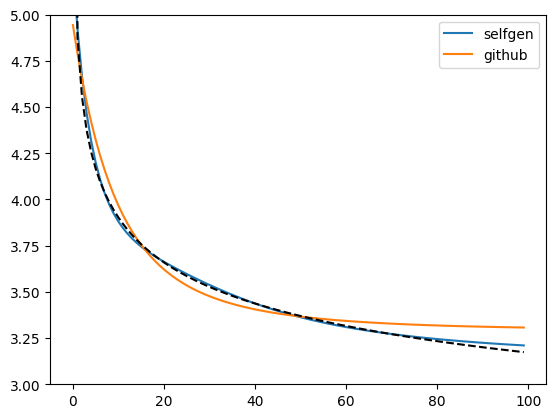

In [51]:
ret_freundlich_selfgen = np.load("../data_out/FINN_forward_tests/finn_freundlich_selfgen_c/predicted_retardations/retPred_33.npy")
ret_freundlich_github = np.load("../data_out/FINN_forward_tests/finn_freundlich_github_c/predicted_retardations/retPred_100.npy")

ret_freundlich = np.load("../data_out/FINN_forward_tests/finn_freundlich_selfgen_c/retardation_freundlich.npy")
plt.plot(ret_freundlich_selfgen, label="selfgen")
plt.plot(ret_freundlich_github, label="github")
plt.plot(ret_freundlich, "k--")
plt.ylim(3,5)
plt.legend()
plt.show()

- selfgen freundlich did not converge, but looks good?
- 

../data_out/FINN_forward_tests/finn_freundlich_selfgen_c_598567 ../data_out/FINN_forward_tests/finn_freundlich_selfgen_c_598567/predicted_retardations/retPred_55.npy
../data_out/FINN_forward_tests/finn_freundlich_selfgen_c ../data_out/FINN_forward_tests/finn_freundlich_selfgen_c/predicted_retardations/retPred_33.npy
../data_out/FINN_forward_tests/finn_freundlich_selfgen_c_3546 ../data_out/FINN_forward_tests/finn_freundlich_selfgen_c_3546/predicted_retardations/retPred_75.npy
../data_out/FINN_forward_tests/finn_freundlich_selfgen_c_554242 ../data_out/FINN_forward_tests/finn_freundlich_selfgen_c_554242/predicted_retardations/retPred_42.npy
../data_out/FINN_forward_tests/finn_freundlich_selfgen_c_37264333 ../data_out/FINN_forward_tests/finn_freundlich_selfgen_c_37264333/predicted_retardations/retPred_100.npy
../data_out/FINN_forward_tests/finn_freundlich_selfgen_c_238479 ../data_out/FINN_forward_tests/finn_freundlich_selfgen_c_238479/predicted_retardations/retPred_50.npy
../data_out/FINN_

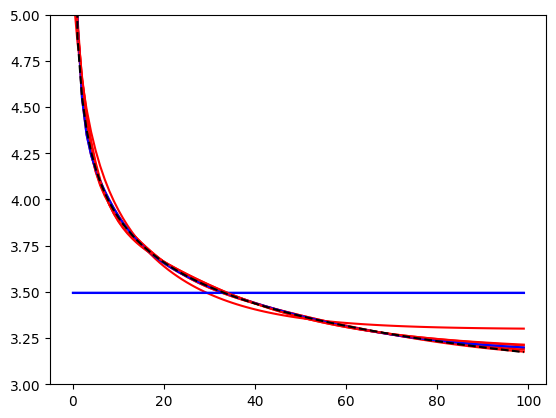

In [57]:
import common
for finn_dir, ret_file_path in common.iter_final_retardation_files(Path("../data_out/FINN_forward_tests"), min_epoch=30):
    if "freundlich_selfgen" not in finn_dir.name:
        continue
    print(finn_dir, ret_file_path)

    epoch = int(ret_file_path.stem.split("_")[-1])
    color = "red" if epoch < 100 else "blue"

    ret = np.load(ret_file_path)
    plt.plot(ret, color=color)
plt.plot(ret_freundlich, "k--")
plt.ylim(3,5)
plt.show()